- A estimação dos parâmetros e o cálculo para prever a volatilidade serão feitos a seguir, a cotação do dólar será o nosso objeto de estudo.
- Inicialmente temos que instalar e importar os pacotes que iremos utilizar:

In [2]:
#Instalação e importação dos pacotes para os buscar os dados e as funções do modelo
!pip install quandl
!pip install arch
import quandl as qdl
from arch import arch_model

#Importação de bibliotecas matemáticas e de ciência de dados
import numpy as np
import pandas as pd


#Pré definição das configuração dos gráficos
import seaborn as sns
sns.set()
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 5)

- Utilizamos o pacote quandl para buscar os dados das cotações do dólar.

<AxesSubplot:xlabel='Date'>

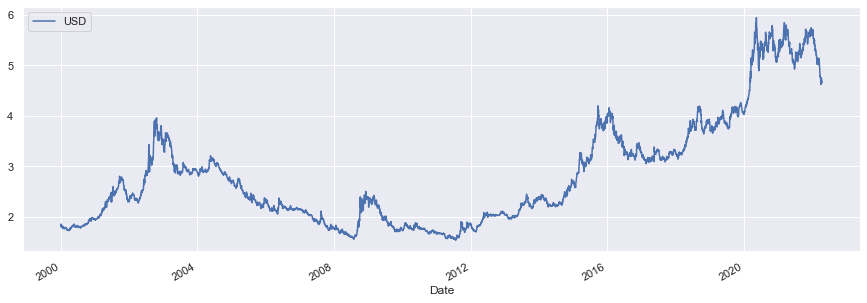

In [5]:
#Definição dos dados
dolar = qdl.get('BCB/1', start_date = '2000-01-01')
 
#Visualização do gráfico das cotações
dolar.rename(columns={'Value': 'USD'}, inplace=True)
dolar.plot()

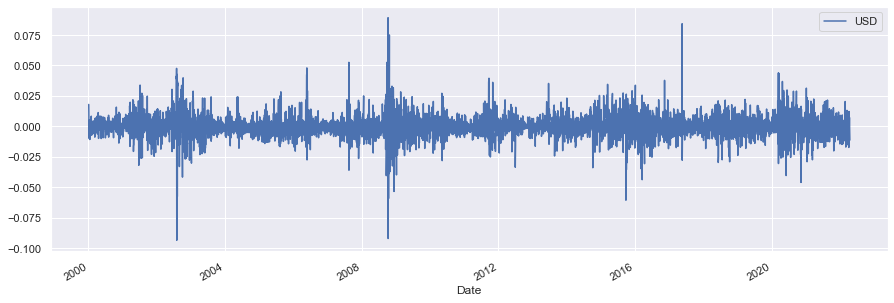

In [7]:
#Visualização do gráfico dos retornos
dolar_ret = np.log(dolar/dolar.shift(1)).dropna()
dolar_ret.plot();

- Para esta análise será necessário padronizar os retornos, subtraindo-os de sua média esperada e dividindo pelo seu desvio padrão.

In [9]:
#Padronização dos retornos
dolar_m = dolar_ret.values.mean()
dolar_dp = dolar_ret.values.std()
dolar_ret_p = (dolar_ret-dolar_m)/dolar_dp

- Para estimar um modelo do tipo GARCH, selecionamos a função arch_model do pacote arch instalado anteriormente. A função arch_model pode especificar um modelo GARCH em vez do modelo ARCH se informamos o modelo de volatilidade a ser utilizado, especificando o seguinte argumento da função  vol = ‘GARCH’, assim como os argumentos de defasagem p=1 e q=1 para determinar um modelo GARCH(1,1):

In [10]:
#Aplicação do Modelo GARCH(1,1) aos dados e vizualização dos resultados
garch_model = arch_model(dolar_ret_p, p=1, q=1, vol='GARCH', dist='Normal')
resultados = garch_model.fit(disp='off')
print(resultados.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    USD   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6921.49
Distribution:                  Normal   AIC:                           13851.0
Method:            Maximum Likelihood   BIC:                           13877.5
                                        No. Observations:                 5596
Date:                Wed, Apr 13 2022   Df Residuals:                     5595
Time:                        23:05:59   Df Model:                            1
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
mu            -0.0287  1.100e-02     -2.614  8.954e-

In [11]:
#Previsão da volatilidade
resultados_forecast = resultados.forecast(horizon=5)
print(resultados_forecast.variance[-1:])

                h.1       h.2       h.3       h.4       h.5
Date                                                       
2022-04-13  1.00388  1.013974  1.024044  1.034089  1.044109


C:\Users\Rodrigo\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


- Cada coluna “h.n” da saída da previsão corresponde a n d períodos a frente, neste caso n dias a frente. A saída é alinhada para que a coluna “Date” represente os dados finais usados para gerar a previsão, de modo que “h.1” na linha “2022-04-13” seja a previsão da volatilidade condicional esperada de um dia à frente, feita usando dados até 13 de abril de 2022.
- O gráfico hedgehog a seguir mostra os métodos de previsão ao longo do período analisado.
- As linhas laranja indicam as previsões em diferentes intervalos de tempo.

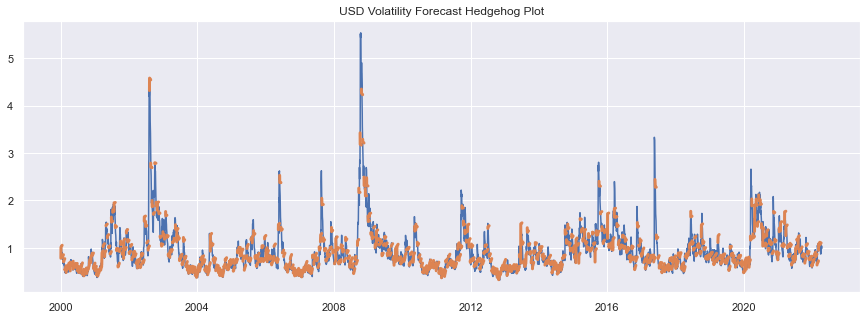

In [12]:
#Visualização do gráfico hedgehog
g_previsões = resultados.hedgehog_plot()

- Biblioteca GetHFData para contratos de derivativos:
https://github.com/msperlin/GetHFData

In [13]:
#!pip install rpy2

#from rpy2.robjects.packages import importr
#utils = importr('utils')
#utils.install_packages('GetHFData')

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Rodrigo\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Rodrigo\\AppData\\Local\\Temp\\pip-install-g5xuurn_\\rpy2_d505ce9f7fed45149fa47f3465fce99d\\setup.py'"'"'; __file__='"'"'C:\\Users\\Rodrigo\\AppData\\Local\\Temp\\pip-install-g5xuurn_\\rpy2_d505ce9f7fed45149fa47f3465fce99d\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Rodrigo\AppData\Local\Temp\pip-pip-egg-info-e049d1ls'
         cwd: C:\Users\Rodrigo\AppData\Local\Temp\pip-install-g5xuurn_\rpy2_d505ce9f7fed45149fa47f3465fce99d\
    Complete output (5 lines):
    Unable to determine R home: [WinError 2] O sistema não pode encontrar o arquivo especificado
    Unable to determine R home.
    Unable to determine R home: [WinError 2] O sistema não pode encontrar 

  Created wheel for rpy2: filename=rpy2-3.1.0-py3-none-any.whl size=169826 sha256=355544ea7605dee7b118c852d9ca10ffa1a28c8a3ecc47951fc8b740419a0bcd
  Stored in directory: c:\users\rodrigo\appdata\local\pip\cache\wheels\65\03\76\e62b54cc9527dab43af24b844e26abd4cf479850fbd842d8f7
Successfully built rpy2


ValueError: r_home is None. Try python -m rpy2.situation